# <u>Training Exercices - Time Series: Application<u>

__<u>Jorge Pineño Pérez<u>__ / Module 7 - Time Series

In [169]:
# package imports
install.packages("readxl")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("zoo")
install.packages("dynlm")
install.packages("egcm")
install.packages("lmtest")
install.packages("car")
install.packages("Metrics")
library(readxl)
library(dplyr)
library(ggplot2)
library(zoo)
library(dynlm)
library(egcm)
library(lmtest)
library(car)
library(Metrics)

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'zoo' is in use and will not be installed"
Warning message:
"package 'dynlm' is in use and will not be installed"
Warning message:
"package 'egcm' is in use and will not be installed"
Warning message:
"package 'lmtest' is in use and will not be installed"
Warning message:
"package 'car' is in use and will not be installed"
Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp0udfY0\downloaded_packages


__<u>Training Exercise 6.5<u>__

In [10]:
# import the industrial production and composite leading index dataframe
ind <- read_excel('TrainExer65.xlsx')
head(ind)

YEAR,LOGIP,LOGCLI,GIP,GCLI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1960,3.207248,3.437208,-0.06361239,-0.01594930
1961,3.325288,3.538057,0.11803930,0.10084875
1962,3.359298,3.566712,0.03401063,0.02865526
1963,3.425988,3.621671,0.06668913,0.05495888
1964,3.511217,3.683867,0.08522948,0.06219621
1965,3.603730,3.735286,0.09251295,0.05141891


In [33]:
# convert the tibble to a zoo object of time-series for later use
ind_ts <- zoo(cbind(
    LOGIP = ind$LOGIP,
    LOGCLI = ind$LOGCLI,
    GIP = ind$GIP,
    GCLI = ind$GCLI    
), order.by=ind$YEAR) # use 1960-2002 as estimation and test sample,
                      # and 2003-2007 as hold-out forecast evaluation sample
head(ind_ts)

        LOGIP   LOGCLI         GIP        GCLI
1960 3.207248 3.437208 -0.06361239 -0.01594930
1961 3.325288 3.538057  0.11803930  0.10084875
1962 3.359298 3.566712  0.03401063  0.02865526
1963 3.425988 3.621671  0.06668913  0.05495888
1964 3.511217 3.683867  0.08522948  0.06219621
1965 3.603730 3.735286  0.09251295  0.05141891

__(a)__

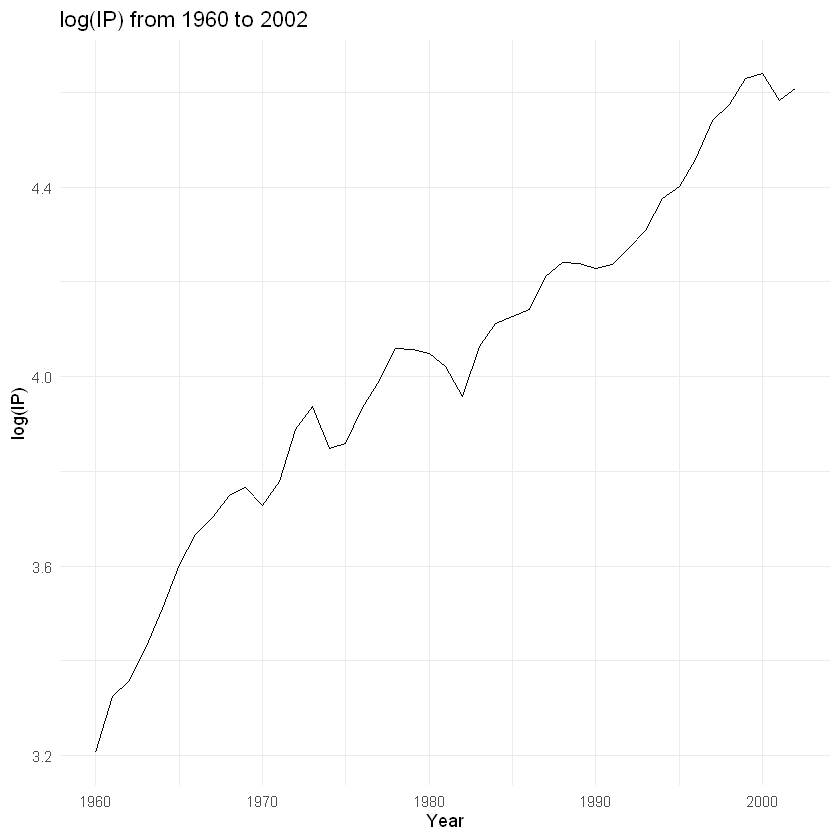

In [17]:
# plot the logarithm of Industrial Production (LOGIP) against the Year
ip_plot <- ind_ts %>%
  filter(YEAR>=1960, YEAR<=2002) %>%
  ggplot(aes(x=YEAR, y=LOGIP)) + geom_line() +
  labs(title='log(IP) from 1960 to 2002', x='Year', y='log(IP)') +
  theme_minimal()
show(ip_plot)

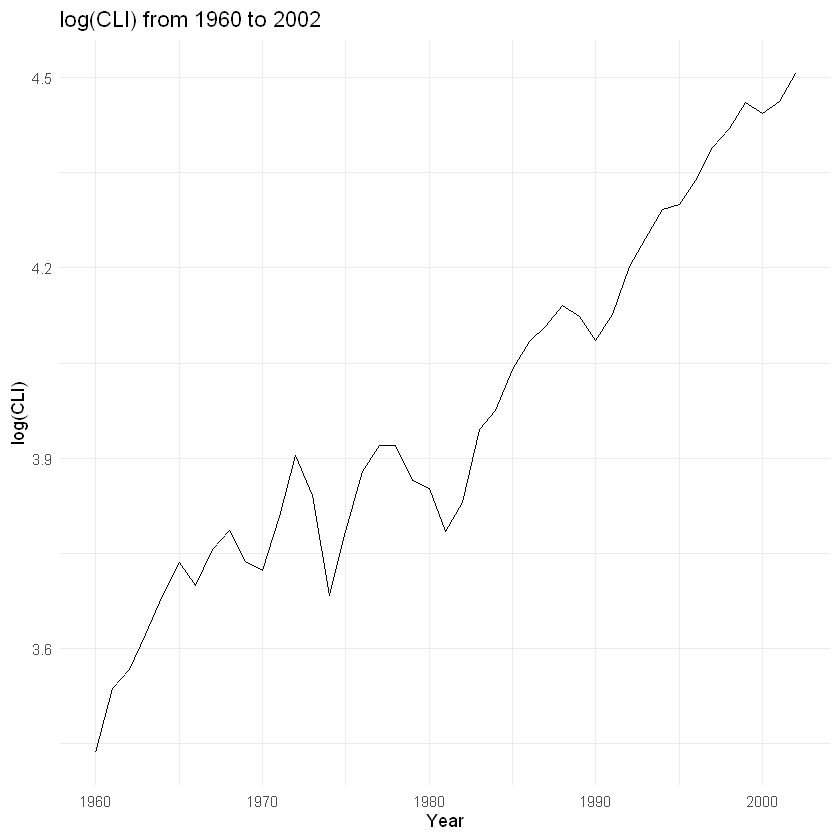

In [15]:
# plot the logarithm of Composite Leading Index (LOGCLI) against the Year
cli_plot <- ind_ts %>%
  filter(YEAR>=1960, YEAR<=2002) %>%
  ggplot(aes(x=YEAR, y=LOGCLI)) + geom_line() +
  labs(title='log(CLI) from 1960 to 2002', x='Year', y='log(CLI)') +
  theme_minimal()
show(cli_plot)

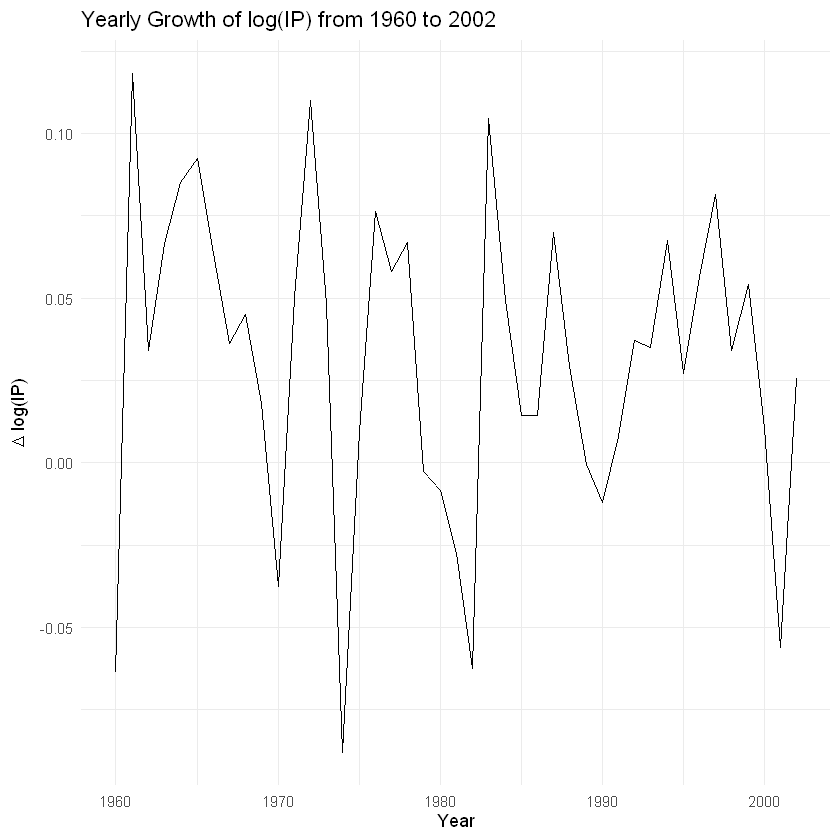

In [21]:
# plot the yearly growth of the logarithm
# of IP (GIP) against the Year
gip_plot <- ind_ts %>%
  filter(YEAR>=1960, YEAR<=2002) %>%
  ggplot(aes(x=YEAR, y=GIP)) + geom_line() +
  labs(title='Yearly Growth of log(IP) from 1960 to 2002', x='Year', y=expression(Delta~'log(IP)')) +
  theme_minimal()
show(gip_plot)

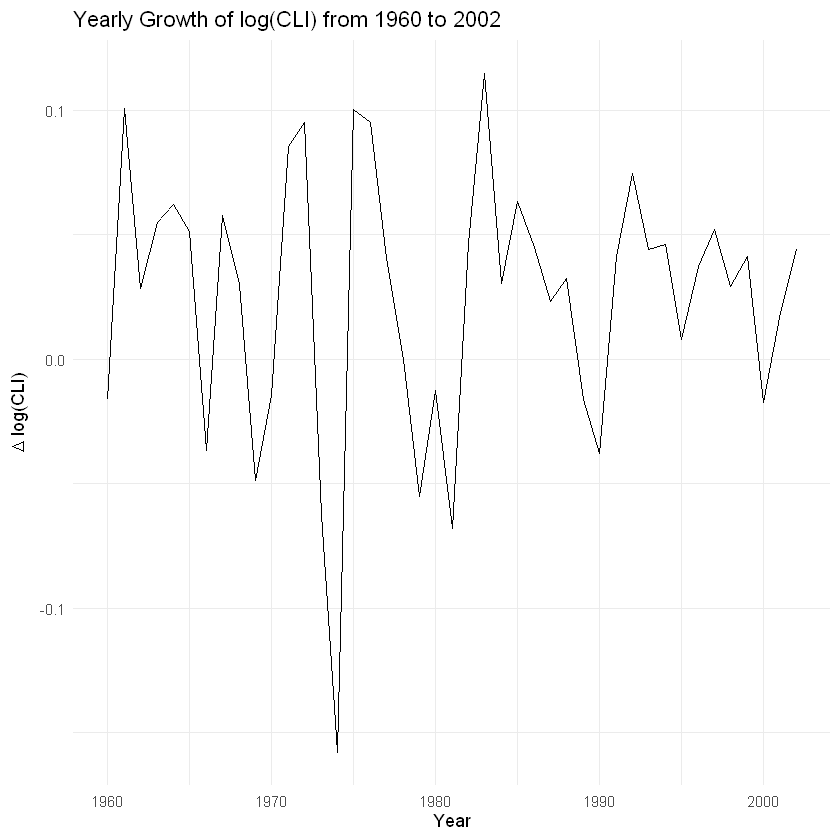

In [22]:
# plot the yearly growth of the logarithm
# of CLI (GCLI) against the Year
gcli_plot <- ind_ts %>%
  filter(YEAR>=1960, YEAR<=2002) %>%
  ggplot(aes(x=YEAR, y=GCLI)) + geom_line() +
  labs(title='Yearly Growth of log(CLI) from 1960 to 2002', x='Year', y=expression(Delta~'log(CLI)')) +
  theme_minimal()
show(gcli_plot)

__(b)__

__(i)__

In [34]:
# perform the ADF test for log(IP), including a constant, a deterministic
# trend term, and two lags of "GIP", and check the coefficient of
# "L(LOGIP, 1)", and its standard error and t-value
adf_logip <- dynlm(GIP ~ index(ind_ts) + L(LOGIP, 1) + L(GIP, 2), data=ind_ts)
summary(adf_logip)


Time series regression with "zoo" data:
Start = 1962, End = 2007

Call:
dynlm(formula = GIP ~ index(ind_ts) + L(LOGIP, 1) + L(GIP, 2), 
    data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101031 -0.017538  0.001109  0.028789  0.072853 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -11.954053   5.091582  -2.348   0.0237 *
index(ind_ts)   0.006570   0.002762   2.378   0.0220 *
L(LOGIP, 1)    -0.255898   0.096764  -2.645   0.0115 *
L(GIP, 2)      -0.071475   0.135454  -0.528   0.6005  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03862 on 42 degrees of freedom
Multiple R-squared:  0.2114,	Adjusted R-squared:  0.1551 
F-statistic: 3.754 on 3 and 42 DF,  p-value: 0.01779


__(ii)__

In [35]:
# perform the ADF test for log(CLI), including a constant, a deterministic
# trend term, and two lags of "CLI", and check the coefficient of
# "L(LOCLI, 1)", and its standard error and t-value
adf_logcli <- dynlm(GCLI ~ index(ind_ts) + L(LOGCLI, 1) + L(GCLI, 2), data=ind_ts)
summary(adf_logcli)


Time series regression with "zoo" data:
Start = 1962, End = 2007

Call:
dynlm(formula = GCLI ~ index(ind_ts) + L(LOGCLI, 1) + L(GCLI, 
    2), data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152989 -0.026227  0.008325  0.033611  0.067824 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -5.489885   4.480277  -1.225   0.2273  
index(ind_ts)  0.003031   0.002466   1.229   0.2259  
L(LOGCLI, 1)  -0.121868   0.105480  -1.155   0.2545  
L(GCLI, 2)    -0.311456   0.154275  -2.019   0.0499 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04825 on 42 degrees of freedom
Multiple R-squared:  0.1893,	Adjusted R-squared:  0.1313 
F-statistic: 3.268 on 3 and 42 DF,  p-value: 0.03046


__(c)__

In [38]:
# perform the Engle-Granger test for cointegration of log(IP) and log(CLI),
# and check the t and p-value for the ADF in step two (errors), knowing that
# if the p-value > 0.05, we will consider the 2 series to not be cointegrated
eg <- egcm(ind_ts$LOGIP, ind_ts$LOGCLI)
summary(eg)

Y[i] =   0.8016 X[i] +   0.7580 + R[i], R[i] =   1.0000 R[i-1] + eps[i], eps ~ N(0,  0.0420^2)
        (0.0295)        (0.1235)                (0.0736)

R[2007] = 0.0872 (t = 1.075)


Unit Root Tests of Residuals
                                                    Statistic    p-value
  Augmented Dickey Fuller (ADF)                        -1.852    0.53727
  Phillips-Perron (PP)                                 -6.744    0.60178
  Pantula, Gonzales-Farias and Fuller (PGFF)            0.874    0.57253
  Elliott, Rothenberg and Stock DF-GLS (ERSD)          -1.136    0.61008
  Johansen's Trace Test (JOT)                         -27.134    0.01035
  Schmidt and Phillips Rho (SPR)                        0.285    0.92835

Variances
  SD(diff(X))          =   0.043477
  SD(diff(Y))          =   0.052423
  SD(diff(residuals))  =   0.041986
  SD(residuals)        =   0.081124
  SD(innovations)      =   0.041986

Half life       = Infinite
R[last]         =   0.087222 (t=1.08)

__(d)__

In [40]:
# perform the Granger (F-)test of "GIP" for "GCLI" including
# a constant, and two lags of both "GIP" and "GCLI", and check the
# degrees of freedom (Df) and the p-value (Pr(>F))
gt1 <- grangertest(GCLI ~ GIP, order=2, data=ind)
gt1

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,41,NA,NA,NA
2,43,-2,3.135072,0.05408006


In [41]:
# perform the Granger (F-)test of "GCLI" for "GIP" including
# a constant, and two lags of both "GIP" and "GCLI", and check the
# degrees of freedom (Df) and the p-value (Pr(>F))
gt1 <- grangertest(GIP ~ GCLI, order=2, data=ind)
gt1

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,41,NA,NA,NA
2,43,-2,13.27084,3.596215e-05


__(e)__

In [46]:
# show that the coefficients of both lags in an
# AR(2) model for GIP are insignificant by checking
# their p-values
ins_coef <- arima(ind_ts$GIP, order=c(2, 0, 0))
coeftest(ins_coef)


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.1791097  0.1493335  1.1994    0.2304    
ar2       -0.2469331  0.1533933 -1.6098    0.1074    
intercept  0.0300366  0.0058834  5.1053 3.302e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [48]:
# show that even the slope coefficient in the
# AR(1) model for GIP is insignificant
ins_coef2 <- arima(ind_ts$GIP, order=c(1, 0, 0))
coeftest(ins_coef2)


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1       0.1245486  0.1488396  0.8368    0.4027    
intercept 0.0299356  0.0073086  4.0960 4.204e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [50]:
# fit an AR(1) model for "GIP"
gip_ar1 <- dynlm(GIP ~ L(GIP, 1), data=ind_ts)
summary(gip_ar1)


Time series regression with "zoo" data:
Start = 1961, End = 2007

Call:
dynlm(formula = GIP ~ L(GIP, 1), data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122063 -0.019185  0.000218  0.025224  0.096638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.028730   0.007677   3.743 0.000514 ***
L(GIP, 1)   0.115211   0.140942   0.817 0.417987    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04363 on 45 degrees of freedom
Multiple R-squared:  0.01463,	Adjusted R-squared:  -0.007265 
F-statistic: 0.6682 on 1 and 45 DF,  p-value: 0.418


In [53]:
# fit a simple model for "GIP" with just a constant
gip_simpl <- lm(GIP ~ 1, data=ind_ts)
summary(gip_simpl)


Call:
lm(formula = GIP ~ 1, data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118051 -0.020000  0.003399  0.029278  0.087798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.030241   0.006521   4.637 2.84e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04518 on 47 degrees of freedom


In [173]:
# make a forecast for 2003-2007 from the AR(1) model
ind_ts$GIP_lag <- c(NA, head(ind_ts$GIP, -1)) # create a GIP lag column in the zoo object
gip_ar1_fc <- coef(gip_ar1)[1] + coef(gip_ar1)[2] * ind_ts$GIP_lag
gip_ar1_fc[index(gip_ar1_fc) %in% c(2003:2007)]

      2003       2004       2005       2006       2007 
0.03167795 0.03093410 0.03256469 0.03193803 0.03021371 

In [174]:
# make a forecast for 2003-2007 from the simple model
gip_simpl_fc <- coef(gip_simpl)[1] + resid(gip_simpl)
gip_simpl_fc <- zoo(gip_simpl_fc, order.by=index(ind_ts)) # convertto a zoo object with the same index as ind_ts
gip_simpl_fc[index(gip_simpl_fc) %in% c(2003:2007)]

      2003       2004       2005       2006       2007 
0.01913316 0.03328627 0.02784703 0.01288042 0.02036752 

__(f)__

In [158]:
# estimate an ADL(2,2) model for "GIP"
gip_adl22 <- dynlm(GIP ~ L(GIP, 1) + L(GIP, 2) + L(GCLI, 1) + L(GCLI, 2), data=ind_ts)
summary(gip_adl22)


Time series regression with "zoo" data:
Start = 1962, End = 2007

Call:
dynlm(formula = GIP ~ L(GIP, 1) + L(GIP, 2) + L(GCLI, 1) + L(GCLI, 
    2), data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062848 -0.018311 -0.007739  0.026068  0.063187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01478    0.00726   2.036   0.0483 *  
L(GIP, 1)   -0.17654    0.17187  -1.027   0.3104    
L(GIP, 2)    0.27101    0.15900   1.704   0.0959 .  
L(GCLI, 1)   0.69694    0.13778   5.058 9.29e-06 ***
L(GCLI, 2)  -0.20717    0.14504  -1.428   0.1608    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03245 on 41 degrees of freedom
Multiple R-squared:  0.4564,	Adjusted R-squared:  0.4034 
F-statistic: 8.607 on 4 and 41 DF,  p-value: 3.871e-05


In [161]:
# perform an F-test to show that the hypthesis that
# the coefficient of L(GIP, 1) = the coefficient of L(GIP, 2) = 0
# is not rejected (Pr(>F) > 0.05)
linearHypothesis(gip_adl22, c("L(GIP, 1)=0", "L(GIP, 2)=0"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,0.04716060,NA,NA,NA,NA
2,41,0.04317461,2,0.003985996,1.892615,0.1636083


In [162]:
# estimate an ADL(0,1) model for "GIP"
gip_adl01 <- dynlm(GIP ~ L(GCLI, 1), data=ind_ts)
summary(gip_adl01)


Time series regression with "zoo" data:
Start = 1961, End = 2007

Call:
dynlm(formula = GIP ~ L(GCLI, 1), data = ind_ts)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079731 -0.022414 -0.003729  0.028261  0.104797 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.020565   0.005949   3.457   0.0012 ** 
L(GCLI, 1)  0.459097   0.103031   4.456 5.49e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03662 on 45 degrees of freedom
Multiple R-squared:  0.3061,	Adjusted R-squared:  0.2907 
F-statistic: 19.86 on 1 and 45 DF,  p-value: 5.49e-05


In [175]:
# make a forecast for 2003-2007 from the ADL(0,1) model
ind_ts$GCLI_lag <- c(NA, head(ind_ts$GCLI, -1)) # create a GCLI lag column in the zoo object
gip_adl01_fc <- coef(gip_adl01)[1] + coef(gip_adl01)[2] * ind_ts$GCLI_lag
gip_adl01_fc[index(gip_adl01_fc) %in% c(2003:2007)]

      2003       2004       2005       2006       2007 
0.04078782 0.05193453 0.04411318 0.03036139 0.02144490 

__(g)__

In [205]:
# compute the RMSE, MAE and SUM of the three forecasts done 
rmse_gip_ar1 <- rmse(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                        gip_ar1_fc[index(gip_adl01_fc) %in% c(2003:2007)])
rmse_gip_simpl <- rmse(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                       gip_simpl_fc[index(gip_simpl_fc) %in% c(2003:2007)])
rmse_gip_adl01 <- rmse(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                       gip_adl01_fc[index(gip_adl01_fc) %in% c(2003:2007)])

mae_gip_ar1 <- mae(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                   gip_ar1_fc[index(gip_adl01_fc) %in% c(2003:2007)])
mae_gip_simpl <- mae(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                     gip_simpl_fc[index(gip_simpl_fc) %in% c(2003:2007)])
mae_gip_adl01 <- mae(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)],
                     gip_adl01_fc[index(gip_adl01_fc) %in% c(2003:2007)])

sum_gip_ar1 <- sum(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)] -
                   gip_ar1_fc[index(gip_adl01_fc) %in% c(2003:2007)])
sum_gip_simpl <- sum(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)] -
                     gip_simpl_fc[index(gip_simpl_fc) %in% c(2003:2007)])
sum_gip_adl01 <- sum(ind_ts$GIP[index(ind_ts) %in% c(2003:2007)] -
                     gip_adl01_fc[index(gip_adl01_fc) %in% c(2003:2007)])

# create a dataframe with the results
results <- data.frame(AR1 = c(rmse_gip_ar1, mae_gip_ar1, sum_gip_ar1),
                      Simple = c(rmse_gip_simpl, mae_gip_simpl, sum_gip_simpl),
                      ADL01 = c(rmse_gip_adl01, mae_gip_adl01, sum_gip_adl01),
                      row.names = c('RMSE', 'MAE', 'SUM')
                     )
round(results, 18)

,AR1,Simple,ADL01
,<dbl>,<dbl>,<dbl>
RMSE,0.011360466,4.0e-18,0.01666142
MAE,0.009703686,4.0e-18,0.01502548
SUM,-0.043814082,-2.1e-17,-0.07512741
